In [23]:
import pickle
with open("../data/train_arrays.pkl", "rb") as f1, open("../data/test_arrays.pkl", "rb") as f2:
    data_train = pickle.load(f1)
    data_test = pickle.load(f2)
    

In [24]:
import numpy as np
X_train, y_train = data_train
images_array = X_train[..., np.newaxis]
X_test, y_test = data_test
test_images = X_test[..., np.newaxis]

In [25]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test  = to_categorical(y_test, num_classes=7)

In [46]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [47]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomTranslation(0.02, 0.02)
])

In [61]:
input_shape = images_array.shape[1:]
print(input_shape)

(48, 48, 1)


In [79]:
print(X_train.min(), X_train.max()) 
print(X_train.dtype)


0.0 1.0
float32


In [63]:
X_train = X_train[..., np.newaxis]  # shape -> (33099, 48, 48, 1)
X_test  = X_test[..., np.newaxis]   # shape -> (quelque_chose, 48, 48, 1)

Epoch 1/30
1035/1035 [==============================] - 23s 21ms/step - loss: 1.7767 - accuracy: 0.2938 - val_loss: 1.5928 - val_accuracy: 0.3675
Epoch 2/30
1035/1035 [==============================] - 21s 20ms/step - loss: 1.5028 - accuracy: 0.4263 - val_loss: 1.4407 - val_accuracy: 0.4485
Epoch 3/30
1035/1035 [==============================] - 22s 21ms/step - loss: 1.3862 - accuracy: 0.4726 - val_loss: 1.3483 - val_accuracy: 0.4774
Epoch 4/30
1035/1035 [==============================] - 22s 21ms/step - loss: 1.2996 - accuracy: 0.5057 - val_loss: 1.2747 - val_accuracy: 0.5084
Epoch 5/30
1035/1035 [==============================] - 21s 20ms/step - loss: 1.2384 - accuracy: 0.5297 - val_loss: 1.2469 - val_accuracy: 0.5238
Epoch 6/30
1035/1035 [==============================] - 21s 21ms/step - loss: 1.1933 - accuracy: 0.5481 - val_loss: 1.2204 - val_accuracy: 0.5323
Epoch 7/30
1035/1035 [==============================] - 22s 21ms/step - loss: 1.1510 - accuracy: 0.5651 - val_loss: 1.1970 -

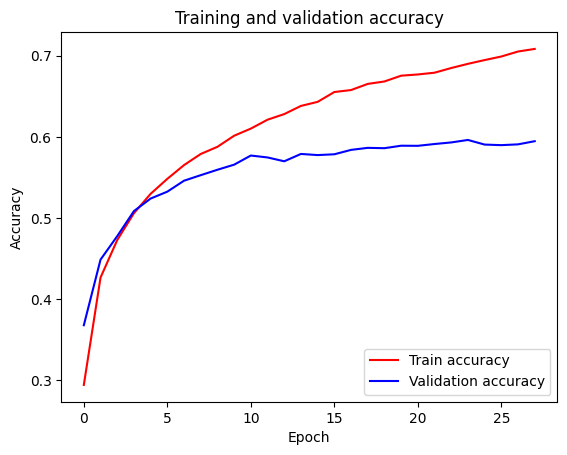

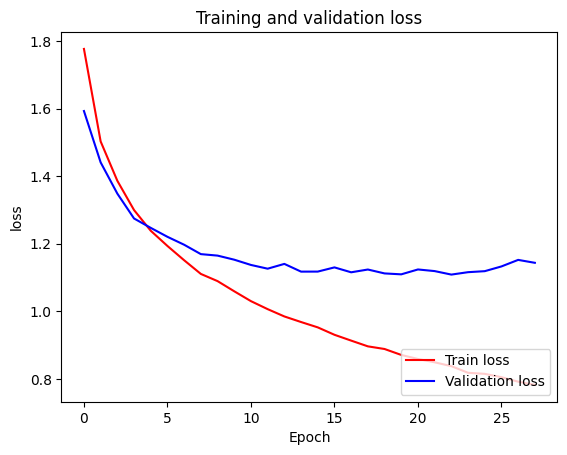

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(64, (3,3), padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation="softmax"))


model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

batch = 32
epochs= 30


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.05
)



steps_per_epoch = np.ceil(len(X_train)/ batch)
validation_steps = np.ceil(len(X_test)/ batch)

stop_early = EarlyStopping(
    monitor="val_loss", 
    patience=5, 
    restore_best_weights=True  
)

# history = model.fit(datagen.flow(X_train,
#                     y_train, batch_size=batch,),
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(X_test, y_test),
#                     shuffle=True,
#                     callbacks=[stop_early])

history = model.fit(X_train,
                    y_train, 
                    batch_size=batch,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    callbacks=[stop_early])


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]



epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Train accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc="lower right")
plt.show()


plt.plot(epochs, loss, "r", label="Train loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")

plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Training and validation loss")
plt.legend(loc="lower right")
plt.show()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_20 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 conv2d_161 (Conv2D)         (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)      

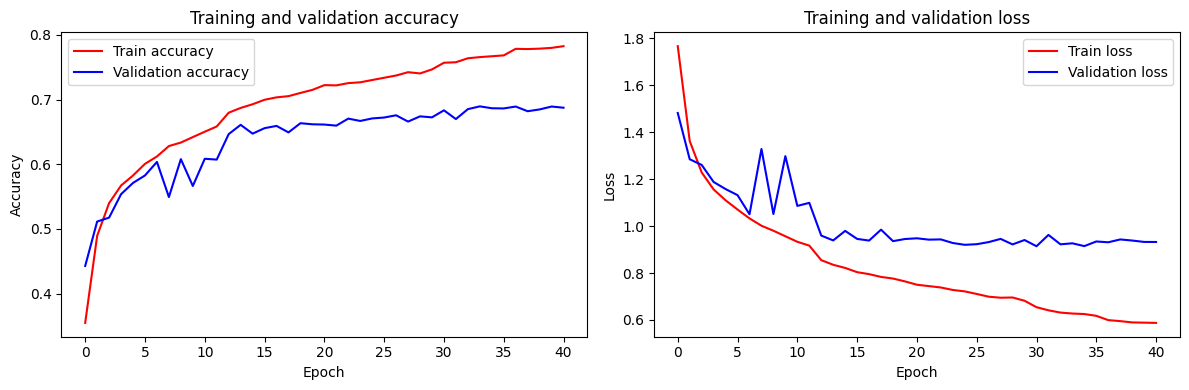

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(64, (3,3), padding="same", input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation="softmax"))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

batch = 32
epochs = 50  


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,         
    width_shift_range=0.05,   
    height_shift_range=0.05,  
    horizontal_flip=True,
    zoom_range=0.05
)


stop_early = EarlyStopping(
    monitor="val_loss", 
    patience=10,  # Plus de patience
    restore_best_weights=True  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch),
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[stop_early, reduce_lr]
)


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, "r", label="Train accuracy")
plt.plot(epochs_range, val_acc, "b", label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, "r", label="Train loss")
plt.plot(epochs_range, val_loss, "b", label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
file_path = "../data/cnn_emotion_detector.h5"
model.save(file_path)

In [3]:
X_train = np.expand_dims(X_train, axis=-1)  # shape -> (nb_samples, 48, 48, 1)
X_test = np.expand_dims(X_test, axis=-1)

NameError: name 'X_train' is not defined